<a href="https://colab.research.google.com/github/ssshendo3501/study-record/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E5%AE%9F%E8%A3%853h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習実装3h

[【完全版】この動画1本で機械学習実装（Python）の基礎を習得！忙しい人のための速習コース](https://youtu.be/okpRV08-svw)



# 教師有り学習（回帰）

##データダウンロード

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_boston

ImportError: ignored

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
t = dataset.values[1::2, 2]

In [ ]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
t

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
type(x), x.shape

(numpy.ndarray, (506, 13))

In [ ]:
type(t), t.shape

(numpy.ndarray, (506,))

In [ ]:
#CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE,', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [ ]:
df = pd.DataFrame(x, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,"AGE,",DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df['Target'] = t
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,"AGE,",DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
t = df['Target'].values

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [ ]:
#dfで目的変数をTargetとしてそれ以外を説明変数xとする
x = df.drop(labels='Target', axis=1).values

In [ ]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## データ分割

In [ ]:
#データセットを学習用データとテスト用データに分ける
from sklearn.model_selection import train_test_split

In [ ]:
#test_size=0.3 データを学習用データとテスト用データで7:3に分ける
#random_state=0
x_train, x_test, t_train,t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
#506行の7割分
len(x_train)

354

In [ ]:
len(x_test)

152

## モデル学習

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#モデルのインスタンスを定義
model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
#scikit-learnではfitを使う
#fitの引数に学習用データセットを入れる
model.fit(x_train, t_train)

LinearRegression()

In [ ]:
#重回帰のパラメータ：13個の重みの値が入っている
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

<BarContainer object of 13 artists>

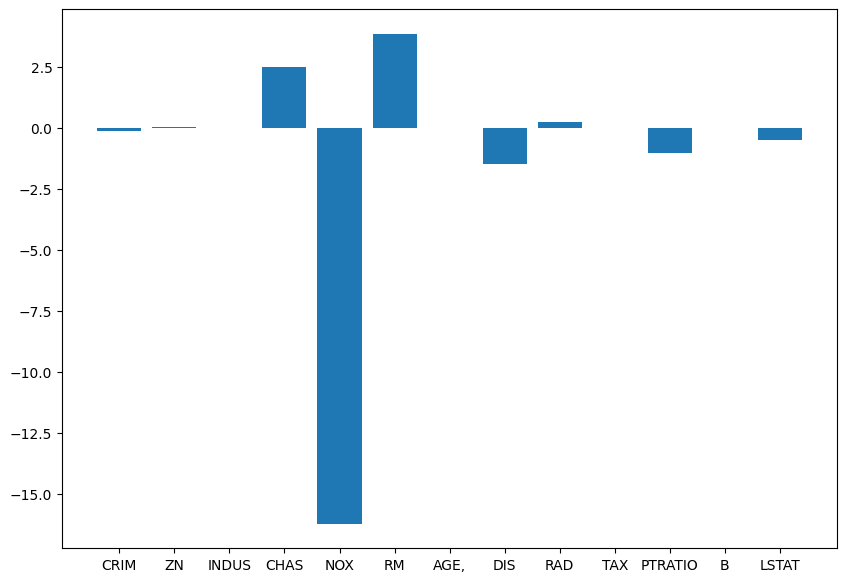

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x=columns, height=model.coef_)

In [ ]:
#重回帰のバイアス（切片）の確認
model.intercept_

37.93710774183308

In [ ]:
print(f'train_score:{model.score(x_train, t_train)}') #学習用データのスコア
print(f'test_score:{model.score(x_test, t_test)}') #テスト用データのスコア

train_score:0.7645451026942548
test_score:0.6733825506400171


## 推論

In [ ]:
y = model.predict(x_test)

In [ ]:
y

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [ ]:
print(f'予測値: {y[0]}')
print(f'目標値: {t_test[0]}')

予測値: 24.935707898576915
目標値: 22.6


In [ ]:
print(f'予測値: {y[1]}')
print(f'目標値: {t_test[1]}')

予測値: 23.751631640748066
目標値: 50.0


In [ ]:
print(f'予測値: {y[2]}')
print(f'目標値: {t_test[2]}')

予測値: 29.326382964551357
目標値: 23.0


Text(0, 0.5, 'achievement')

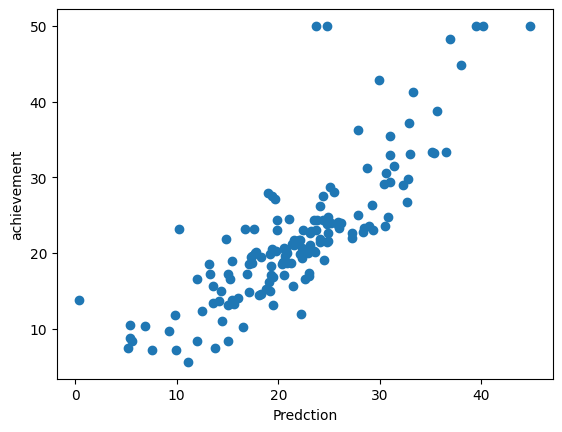

In [ ]:
plt.scatter(y, t_test)
plt.xlabel('Predction')
plt.ylabel('achievement')

## 過学習を抑制する方法


*   データセットのサンプル数を増やす
*   ハイパーパラメータを調整する
*   他のアルゴリズムを使う



In [ ]:
df = pd.read_csv('/content/regression_pls.csv')
df.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,...,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(1290, 197)

In [ ]:
t = df['Target'].values
x = df.drop('Target', axis=1).values

In [ ]:
t.shape

(1290,)

In [ ]:
x.shape

(1290, 196)

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

#モデルのインスタンスを定義
model = LinearRegression()

In [ ]:
model.fit(x_train, t_train)

LinearRegression()

In [ ]:
#学習用データの精度は高いが、テスト用データのスコアが低いことを過学習という
#理由として、多重共線性（説明変数の中で相間の高いものがある場合に生じる現象）が今回のデータセットで発生しているため
print(f'train_score:{model.score(x_train, t_train)}') #学習用データのスコア
print(f'test_score:{model.score(x_test, t_test)}') #テスト用データのスコア

train_score:0.9365473244865767
test_score:0.006164361245877936


In [ ]:
#相間行列
df_corr = df.corr()

<Axes: >

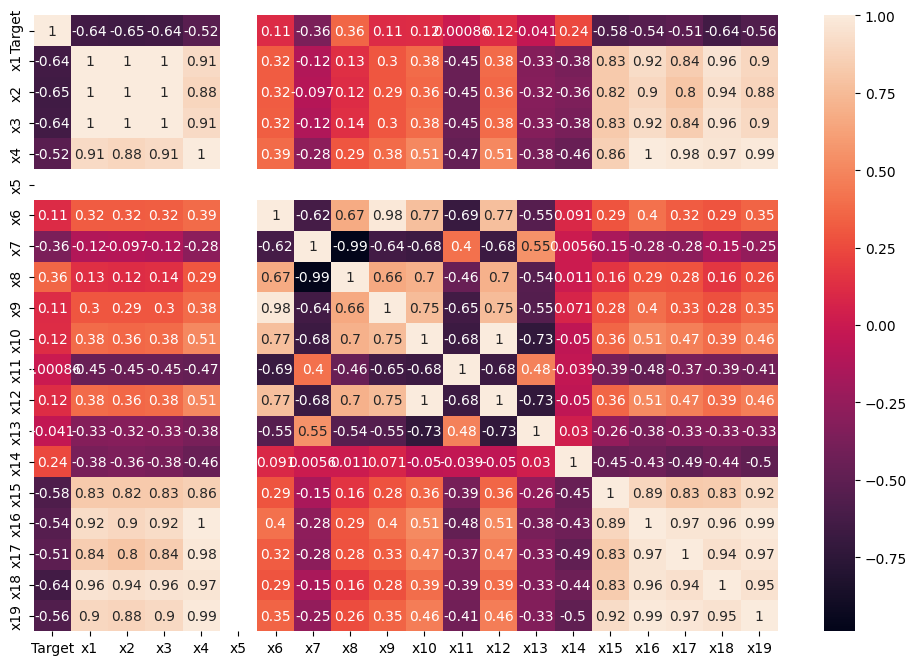

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.iloc[:20, :20], annot=True)

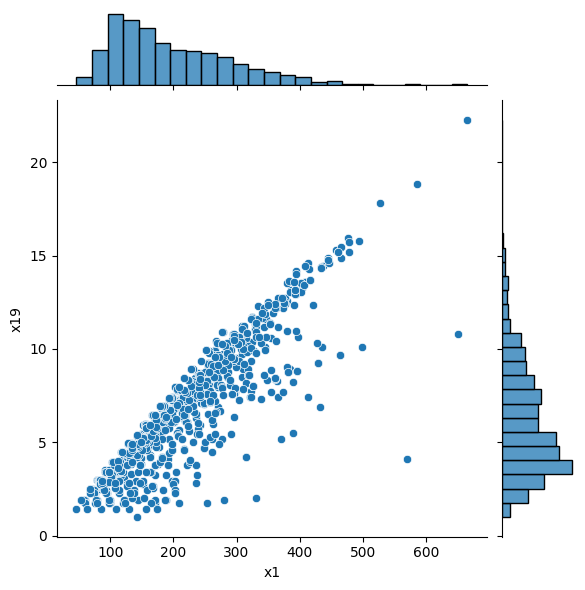

In [ ]:
sns.jointplot(x='x1', y='x19', data=df)

## PLS

*   Partial Least Squares:多重共線性の最適化として強力なアルゴリズム
*   複数の変数から新しいより最適な変数を作り上げてその変数を元に重回帰分析を行うアルゴリズム
*   x→tの情報をもとに主成分分析のようなことを実施し、より凝縮したパラメータ(説明変数)を用いる方法





In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:
#ハイパーパラメータ：n_composnent（複数の説明変数の中から最終的に何個の説明変数を残すか？）
pls = PLSRegression(n_components=12)

In [ ]:
pls.fit(x_train, t_train)

PLSRegression(n_components=12)

In [ ]:
print(f'train_score:{pls.score(x_train, t_train)}') #学習用データのスコア
print(f'test_score:{pls.score(x_test, t_test)}') #テスト用データのスコア

train_score:0.9172040328461957
test_score:0.6585992855806723


In [ ]:
for i in range(2,50):
  pls = PLSRegression(n_components=i)
  pls.fit(x_train, t_train)
  print(f'n_components={i}のとき、train_score:{pls.score(x_train, t_train)} / test_score:{pls.score(x_test, t_test)}')

n_components=2のとき、train_score:0.8255099273437808 / test_score:0.7028254443153685
n_components=3のとき、train_score:0.879641551002729 / test_score:0.7501303523285799
n_components=4のとき、train_score:0.891992251992544 / test_score:0.8565944333973627
n_components=5のとき、train_score:0.898540153072788 / test_score:0.8861639008694533
n_components=6のとき、train_score:0.902992830222619 / test_score:0.8865137016184881
n_components=7のとき、train_score:0.906376310202351 / test_score:0.7387281471807322
n_components=8のとき、train_score:0.910065950410139 / test_score:0.7414670894980251
n_components=9のとき、train_score:0.9125932864957961 / test_score:0.6202872077390155
n_components=10のとき、train_score:0.9142960027277977 / test_score:0.7084919846320682
n_components=11のとき、train_score:0.9157705245807128 / test_score:0.8839475118318947
n_components=12のとき、train_score:0.9172040328461957 / test_score:0.6585992855806723
n_components=13のとき、train_score:0.9181176658578895 / test_score:0.19284800984024175
n_components=14のとき、train_scor

# 教師有り学習（分類）



*   線形分類器：単純パーセプトロン、線形サポートベクターマシン、ロジスティック回帰
*   非線形分類器：k-近傍法、決定木、ランダムフォレスト、非線形SVM、ニューラルネットワーク








## 決定木基礎

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()

In [ ]:
columns_name = dataset.feature_names

In [ ]:
x = dataset.data

In [ ]:
x.shape

(150, 4)

In [ ]:
t = dataset.target

In [ ]:
t.shape

(150,)

In [ ]:
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#目的変数がどのような
np.unique(t)

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
#Regressorは、回帰（数値として予測）に使います。
#Classifierは、分類（OKかNGかなどの判断）に使います。
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=0)

In [ ]:
model

DecisionTreeClassifier(random_state=0)

In [ ]:
model.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print(f'train_score : {model.score(x_train, t_train)}')
print(f'test_score : {model.score(x_test, t_test)}')

train_score : 1.0
test_score : 0.9777777777777777


In [ ]:
#分類には交差エントロピーを用いている

In [ ]:
#推論
model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## 決定木の特徴



*   強み：解釈が容易。必要な前処理が少ない。
*   弱み：過学習になる場合が多く、汎用性の低いモデルになる傾向がある。
*   ハイパーパラメータ：max_depth（木構造の深さの上限）、min_sample_leaf(木構造の分岐先の値)




In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
dot_data = export_graphviz(model)

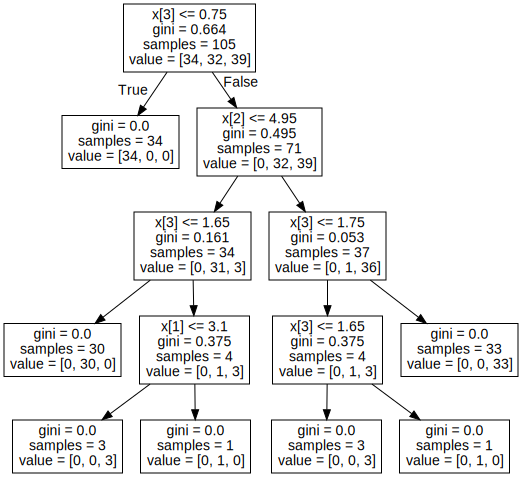

In [ ]:
graph_tree = graphviz.Source(dot_data)
graph_tree

In [ ]:
feature_importance = model.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

<BarContainer object of 4 artists>

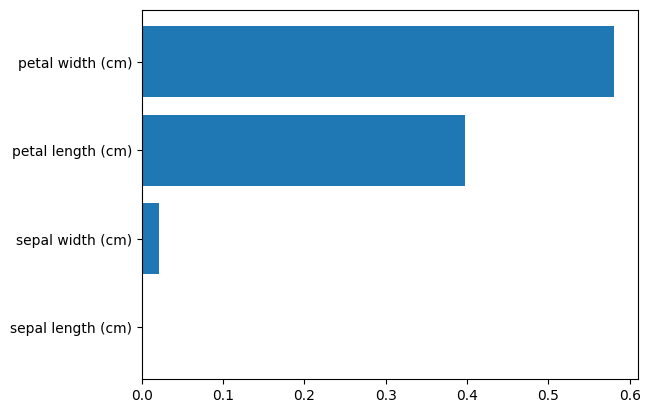

In [ ]:
y = columns_name
width = feature_importance

plt.barh(y=y, width=width)

In [ ]:
#どの特徴量が重要か示すのがデータ分析のPJTで結構ある
#決定木を基本として高性能なモデルが最近よくある（アンサンブル学習モデル）。これらを使ったモデルが最近Kaggleで流行り。
#アンサンブル学習モデルの例：ランダムフォレストやxgboostなど（複数のモデルを使ったモデルから最適なモデルを生み出す手法）

## SVMの基礎

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(x_train, t_train)

SVC()

In [ ]:
print(f'train_score : {model.score(x_train, t_train)}')
print(f'test_score : {model.score(x_test, t_test)}')

train_score : 0.9714285714285714
test_score : 0.9777777777777777


## SVMの特徴量の標準化

In [ ]:
#SVMはデータの標準化をする必要がある
#今回だと特徴量が全てcmで同じスケール感でやっているので標準化を実施しなくても精度がが出せている
#標準化をする必要があるのはSVMが距離の概念を使用するため

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [ ]:
#x_trainの平均値
x_train.mean()

3.4985714285714287

In [ ]:
#標準化したデータの平均は0になる
round(x_train_std.mean())

0

In [ ]:
round(x_train.std())

2

In [ ]:
#標準化した特徴量の標準偏差は1になる
round(x_train_std.std())

1

In [ ]:
model_std = SVC()

In [ ]:
model_std.fit(x_train_std, t_train)

SVC()

In [ ]:
print(f'train_score : {model.score(x_train, t_train)}')
print(f'test_score : {model.score(x_test, t_test)}')
print(f'-------------------------------------------------')
print(f'train_score : {model_std.score(x_train_std, t_train)}')
print(f'test_score : {model_std.score(x_test_std, t_test)}')

train_score : 0.9714285714285714
test_score : 0.9777777777777777
-------------------------------------------------
train_score : 0.9714285714285714
test_score : 0.9777777777777777


## SVMのハイパラ

In [ ]:
#C：コストパラメータ（誤った予測に対する罰則をつける）
#gammma：モデルの複雑さを決定するパラメータ

In [ ]:
model_std = SVC(C=1, gamma=0.01)

In [ ]:
model_std.fit(x_train_std, t_train)

SVC(C=1, gamma=0.01)

In [ ]:
print(f'train_score : {model.score(x_train, t_train)}')
print(f'test_score : {model.score(x_test, t_test)}')
print(f'-------------------------------------------------')
print(f'train_score : {model_std.score(x_train_std, t_train)}')
print(f'test_score : {model_std.score(x_test_std, t_test)}')

train_score : 0.9714285714285714
test_score : 0.9777777777777777
-------------------------------------------------
train_score : 0.9047619047619048
test_score : 0.8888888888888888


# ハイパーパラメータチューニング

## K-fold cross-validation

**k-fold cross-validation（K分割交差検証）とは？**





*   これまでの方法は既存のデータセットを学習用・テスト用で2分割していた。これを**ホールドアウト法**と呼ぶ。
*   しかし、実際の開発では、より高精度なモデルを作るために、**データを3分割（学習用:train、検証法:validation、テスト用:test）**する。
*   テスト用のデータは予測精度の確認のためのみに使用する。
*   しかし、データ数が少ない場合3分割すると偏りが生じてしまい、適切に評価ができない。
*   このようなデータの偏りをなくす手段が**k-fold cross-validation（K分割交差検証）**







 **手順**



1.   データをK個に分割
2.   分割したデータの1個を検証用データセットとして、残りK-1個を学習用データセットとして学習を実行
3.   各検証の結果を平均して最終的な検証結果とする



**代表的な調整方法**



1.   手動での調整    
2.   グリッドサーチ：今回実施する手法
3.  ランダムサーチ：ランダムにハイパーパラメータを調整していく
4.  ベイズ最適化：他の方法と比較して効率よく優れた解を求められると言われる方法



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()

In [ ]:
dataset

In [ ]:
t = dataset.target
x = dataset.data

In [ ]:
x.shape, t.shape

((569, 30), (569,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2, random_state=1)

In [ ]:
x_train_val.shape

(455, 30)

In [ ]:
#ここで学習データを学習データと検証用データに分割する

In [ ]:
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=1)

In [ ]:
x_train.shape, x_val.shape

((318, 30), (137, 30))

In [ ]:
t_train.shape, t_val.shape

((318,), (137,))

## 手動調整

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=0)

In [ ]:
dtree.fit(x_train, t_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=0)

In [ ]:
print(f'train_score : {dtree.score(x_train, t_train)}') #学習用データの正解率
print(f'val_score : {dtree.score(x_val, t_val)}') #検証用データの正解率
print(f'test_score : {dtree.score(x_test, t_test)}')

train_score : 0.9308176100628931
val_score : 0.9562043795620438
test_score : 0.9298245614035088


##グリッドサーチ



*   検証するハイパーパラメータの範囲を決めて(max_depth：5-25やmin_samples_leaf：5-25など)を決めて使用して学習・検証を行う
*   その中で最も正解率が高いパラメータを調整する手法





*   メリット：指定した範囲を網羅するため、ある程度漏れなくハイパラの探索ができる
*   デメリット：場合によっては計算に時間を要する



In [ ]:
from sklearn.model_selection import GridSearchCV

**GridSearchCVクラスを使用するために必要なメソッド**



*   estimator : 学習に使用するモデル
*   param_grid : ハイパーパラメータを選択する範囲
*   CV : k-分割交差検証のKの値



In [ ]:
#estimaor:学習に使用するモデル
estimator = DecisionTreeClassifier(random_state=0)

In [ ]:
#param_grid : ハイパーパラメータを選択する範囲
param_grid = [{
    'max_depth' : [3,20,30],
    'min_samples_leaf' : [3,20,50]
    }]

In [ ]:
#param_grid : ハイパーパラメータを選択する範囲
param_grid = [{
    'max_depth' : [3,20,30],
    'min_samples_leaf' : [3,20,50]
    }]

In [ ]:
#CV : k-分割交差検証のKの値
cv = 5

In [ ]:
tuned_model = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=cv,
                           return_train_score=False)

In [ ]:
tuned_model.fit(x_train_val, t_train_val)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': [3, 20, 30],
                          'min_samples_leaf': [3, 20, 50]}])

In [ ]:
tuned_model.cv_results_

{'mean_fit_time': array([0.01367583, 0.01515021, 0.01388936, 0.01734524, 0.00686517,
        0.00946851, 0.02082305, 0.01910338, 0.00823035]),
 'std_fit_time': array([0.00923426, 0.00253316, 0.00704145, 0.00479787, 0.00305047,
        0.00648538, 0.00558813, 0.01367011, 0.00439594]),
 'mean_score_time': array([0.00405059, 0.00540018, 0.00210252, 0.00446038, 0.00095382,
        0.00145016, 0.00311012, 0.00106106, 0.00308971]),
 'std_score_time': array([6.07838588e-03, 5.15013651e-03, 2.12253848e-03, 4.25212506e-03,
        8.22719749e-05, 1.20242381e-03, 4.08761320e-03, 7.67353225e-05,
        2.67644545e-03]),
 'param_max_depth': masked_array(data=[3, 3, 3, 20, 20, 20, 30, 30, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[3, 20, 50, 3, 20, 50, 3, 20, 50],
              mask=[False, False, False, False, False, False, False, Fals

In [ ]:
#検証結果
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.013676,0.01515,0.013889,0.017345,0.006865,0.009469,0.020823,0.019103,0.00823
std_fit_time,0.009234,0.002533,0.007041,0.004798,0.00305,0.006485,0.005588,0.01367,0.004396
mean_score_time,0.004051,0.0054,0.002103,0.00446,0.000954,0.00145,0.00311,0.001061,0.00309
std_score_time,0.006078,0.00515,0.002123,0.004252,0.000082,0.001202,0.004088,0.000077,0.002676
param_max_depth,3,3,3,20,20,20,30,30,30
param_min_samples_leaf,3,20,50,3,20,50,3,20,50
params,"{'max_depth': 3, 'min_samples_leaf': 3}","{'max_depth': 3, 'min_samples_leaf': 20}","{'max_depth': 3, 'min_samples_leaf': 50}","{'max_depth': 20, 'min_samples_leaf': 3}","{'max_depth': 20, 'min_samples_leaf': 20}","{'max_depth': 20, 'min_samples_leaf': 50}","{'max_depth': 30, 'min_samples_leaf': 3}","{'max_depth': 30, 'min_samples_leaf': 20}","{'max_depth': 30, 'min_samples_leaf': 50}"
split0_test_score,0.901099,0.824176,0.824176,0.967033,0.824176,0.824176,0.967033,0.824176,0.824176
split1_test_score,0.901099,0.912088,0.879121,0.912088,0.912088,0.879121,0.912088,0.912088,0.879121
split2_test_score,0.934066,0.956044,0.912088,0.945055,0.956044,0.912088,0.945055,0.956044,0.912088


In [ ]:
#2段階のハイパラチューニング

In [ ]:
#param_grid : ハイパーパラメータを選択する範囲
param_grid = [{
    'max_depth' : [5,10,15],
    'min_samples_leaf' : [10,12,15]
    }]

In [ ]:
tuned_model = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=cv,
                           return_train_score=False)

In [ ]:
tuned_model.fit(x_train_val, t_train_val)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_leaf': [10, 12, 15]}])

In [ ]:
tuned_model.cv_results_

{'mean_fit_time': array([0.00470967, 0.00459857, 0.00412045, 0.0044601 , 0.00430741,
        0.00554528, 0.00492859, 0.00449715, 0.00416231]),
 'std_fit_time': array([0.0006201 , 0.00054966, 0.00032949, 0.00030904, 0.00027428,
        0.00033879, 0.00080419, 0.00044493, 0.00026028]),
 'mean_score_time': array([0.00063553, 0.00081725, 0.00059319, 0.00060978, 0.00066252,
        0.00086565, 0.00064111, 0.00066524, 0.00057373]),
 'std_score_time': array([7.12978553e-05, 3.28194702e-04, 4.71321632e-06, 6.88464352e-06,
        1.68674592e-04, 4.60132786e-05, 8.27244445e-05, 1.25797776e-04,
        1.43911635e-05]),
 'param_max_depth': masked_array(data=[5, 5, 5, 10, 10, 10, 15, 15, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10, 12, 15, 10, 12, 15, 10, 12, 15],
              mask=[False, False, False, False, False, False, False, F

In [ ]:
#検証結果
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.00471,0.004599,0.00412,0.00446,0.004307,0.005545,0.004929,0.004497,0.004162
std_fit_time,0.00062,0.00055,0.000329,0.000309,0.000274,0.000339,0.000804,0.000445,0.00026
mean_score_time,0.000636,0.000817,0.000593,0.00061,0.000663,0.000866,0.000641,0.000665,0.000574
std_score_time,0.000071,0.000328,0.000005,0.000007,0.000169,0.000046,0.000083,0.000126,0.000014
param_max_depth,5,5,5,10,10,10,15,15,15
param_min_samples_leaf,10,12,15,10,12,15,10,12,15
params,"{'max_depth': 5, 'min_samples_leaf': 10}","{'max_depth': 5, 'min_samples_leaf': 12}","{'max_depth': 5, 'min_samples_leaf': 15}","{'max_depth': 10, 'min_samples_leaf': 10}","{'max_depth': 10, 'min_samples_leaf': 12}","{'max_depth': 10, 'min_samples_leaf': 15}","{'max_depth': 15, 'min_samples_leaf': 10}","{'max_depth': 15, 'min_samples_leaf': 12}","{'max_depth': 15, 'min_samples_leaf': 15}"
split0_test_score,0.89011,0.89011,0.879121,0.89011,0.89011,0.879121,0.89011,0.89011,0.879121
split1_test_score,0.901099,0.901099,0.901099,0.901099,0.901099,0.901099,0.901099,0.901099,0.901099
split2_test_score,0.945055,0.956044,0.956044,0.945055,0.956044,0.956044,0.945055,0.956044,0.956044


In [ ]:
tuned_model.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

In [ ]:
best_model = tuned_model.best_estimator_

In [ ]:
print(f'best_model_train_score : {best_model.score(x_train_val, t_train_val)}')
print(f'best_model_test_score : {best_model.score(x_test, t_test)}')

best_model_train_score : 0.9494505494505494
best_model_test_score : 0.8596491228070176


# 教師無し学習

## 主成分分析



*   教師無し学習とは、データの背後に存在する本質的な構造を抽出する際に用いる
*   主成分分析（Principal Component Analysis）は次元削減（Dimensionality Redcucation）を使用する手法
*   次元削減とは4次元のデータを2次元など低次元に落とし込むことを指す。
*    また、次元削減は単にデータを削除するのではなく、可能な限り元データの情報を保持したまま、低次元のデータに変形する


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()

In [ ]:
x = dataset.data
t = dataset.target

In [ ]:
feature_names = dataset.feature_names

In [ ]:
pd.DataFrame(x, columns=feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#n_components=2というのは次元削減後の次元数を意味している
#主成分分析では次元数をこちらで決めておく
pca = PCA(n_components=2, random_state=0)

In [ ]:
pca.fit(x)

PCA(n_components=2, random_state=0)

In [ ]:
#主成分分析による分散の確認
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

In [ ]:
#主成分へ写像するにはtransformメソッドを使用する

In [ ]:
x_transformed = pca.transform(x)

In [ ]:
#それぞれの列が保持する元データの情報の割合を「寄与率」と呼ぶ
pd.DataFrame(x_transformed, columns=['第1主成分', '第2主成分']).head()

,第1主成分,第2主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [ ]:
#第1主成分の寄与率
pca.explained_variance_ratio_[0]

0.9246187232017271

In [ ]:
#第2主成分の寄与率
pca.explained_variance_ratio_[1]

0.05306648311706782



*   第1主成分が92%, 第2主成分が5%の寄与率ということ
*   つまり、97%の割合で元の情報を保持できているということ
*   3%ほどの情報は損失してしまったという意味
*   第1主成分が元の情報の大半を保持した特徴量となる
*  主成分分析では、100%情報を保持したまま分析を行うのではなく、いくらかの情報は損失してしまう。
*  **そのため、主成分分析の際は寄与率を確認し、元のデータをどの程度再現できているのかを確認することが重要。**


In [ ]:
np.unique(t)

array([0, 1, 2])

<Axes: >

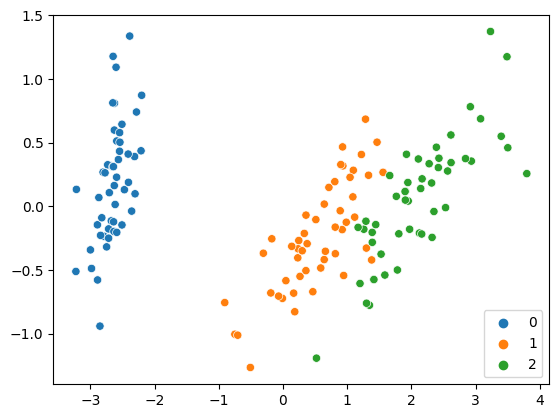

In [ ]:
sns.scatterplot(x=x_transformed[:, 0], y=x_transformed[:, 1], hue=t, palette=sns.color_palette(n_colors=3))

In [ ]:
#下記は第1主成分のみを持ってくるということ
x_transformed[:, 0]

TypeError: ignored

## 主成分分析の注意点



*   主成分分析を行う際は「標準化」を必ず行うこと
*   標準化とは、「平均を0、 分散を1」とする操作
*   主成分分析では、必ず変数の標準化を行う



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
#平均や分散を計算しつつ写像する
x_scaled =  scaler.fit_transform(x)

In [ ]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
pca = PCA(n_components=2, random_state=0)

In [ ]:
x_scaled_transformed = pca.fit_transform(x_scaled)

In [ ]:
#pd.DataFrame(x_scaled_transformed, columns=['第1主成分', '第2主成分'])

,第1主成分,第2主成分
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [ ]:
#第1主成分の寄与率
pca.explained_variance_ratio_[0]

0.7296244541329987

In [ ]:
#第2主成分の寄与率
pca.explained_variance_ratio_[1]

0.2285076178670178

<Axes: >

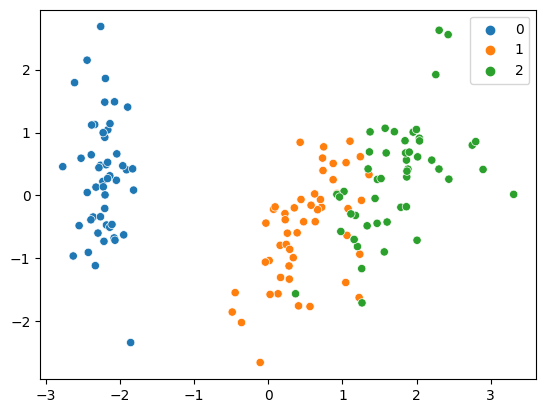

In [ ]:
sns.scatterplot(x=x_scaled_transformed[:, 0], y=x_scaled_transformed[:, 1],
                hue=t, palette=sns.color_palette(n_colors=3))

## k-平均法(k-means)

* クラスタリングと呼ばれる手法にあたり、データを服すのクラスター(グループ)に分けて大まかな特徴と捉える際に使用する



1.   人間側がクラスター(グループ)の数を決める
2.   ランダムに振られた点(重心)から近いものをクラスターとする
3.   紐づいたクラスターとの距離をもとに重心を移動させる



In [ ]:
df = pd.read_csv('/content/convinience_store.csv')

In [ ]:
df.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
0,1,25350,3650,8945,0,4867,8945
1,2,24500,0,0,1827,0,0
2,3,23050,5750,11570,0,7667,11570
3,4,22850,4100,10145,0,5467,10145
4,5,22500,0,0,0,0,0


In [ ]:
x = df.drop('No', axis=1).values

In [ ]:
x[:3]

array([[25350,  3650,  8945,     0,  4867,  8945],
       [24500,     0,     0,  1827,     0,     0],
       [23050,  5750, 11570,     0,  7667, 11570]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#k-meansではクラスター数を予め決めておく
#n_cluster=3とした
kmeans = KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

* モデルの学習でそれぞれのクラスターの中心座標を算出し保持する。
* 今回取り扱ったデータセットの次元数が6次元、クラスター数が3としたため、3行6列の値を確認できる。

In [ ]:
kmeans.cluster_centers_

array([[ 5043.5483871 ,  3486.41935484,  7017.74193548,  2206.        ,
         2512.90322581,  3509.12903226],
       [28681.25      ,  5637.66666667,  1298.75      ,  1271.        ,
         1770.875     ,   716.95833333],
       [17266.66666667,  2730.93333333, 10721.66666667,   590.86666667,
         3447.33333333,  9851.2       ]])

In [ ]:
kmeans.cluster_centers_.shape

(3, 6)

In [ ]:
cluster = kmeans.predict(x)

In [ ]:
cluster

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [ ]:
df_cluster = df.copy()
df_cluster['cluster'] = cluster

In [ ]:
df_cluster.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
0,1,25350,3650,8945,0,4867,8945,2
1,2,24500,0,0,1827,0,0,1
2,3,23050,5750,11570,0,7667,11570,2
3,4,22850,4100,10145,0,5467,10145,2
4,5,22500,0,0,0,0,0,1


## k-meansの考察

* 教師無し学習は教師有り学習とは異なり明確な答えが存在しないため、その予測結果がどのようなもので、**どのように活用するかに関しては人間側が考慮する。**

In [ ]:
df_results = pd.DataFrame()

In [ ]:
df_cluster[df_cluster['cluster'] == 0].mean().tolist()

[37.806451612903224,
 5043.548387096775,
 3486.4193548387098,
 7017.741935483871,
 2206.0,
 2512.9032258064517,
 3509.1290322580644,
 0.0]

In [ ]:
df_results['cluster 0'] = df_cluster[df_cluster['cluster'] == 0].mean().tolist()
df_results['cluster 1'] = df_cluster[df_cluster['cluster'] == 1].mean().tolist()
df_results['cluster 2'] = df_cluster[df_cluster['cluster'] == 2].mean().tolist()

In [ ]:
df_results

,cluster 0,cluster 1,cluster 2
No,37.806452,46.250000,13.533333
弁当・麺類,5043.548387,28681.250000,17266.666667
飲料,3486.419355,5637.666667,2730.933333
おにぎり・サンドイッチ,7017.741935,1298.750000,10721.666667
スイーツ,2206.000000,1271.000000,590.866667
カップスープ,2512.903226,1770.875000,3447.333333
サラダ,3509.129032,716.958333,9851.200000
cluster,0.000000,1.000000,2.000000


In [ ]:
df_results = df_results.drop(['No', 'cluster']).T

In [ ]:
df_results

,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
cluster 0,5043.548387,3486.419355,7017.741935,2206.000000,2512.903226,3509.129032
cluster 1,28681.250000,5637.666667,1298.750000,1271.000000,1770.875000,716.958333
cluster 2,17266.666667,2730.933333,10721.666667,590.866667,3447.333333,9851.200000
